# Group Locomotion Models into Macro-, Meso- and Microscopic and Plot Selected Publications as Timeline

In [47]:
import numpy as np
import pandas as pd

import matplotlib.lines as lines
import matplotlib.pyplot as plt

In [48]:
def use_custom_plot_settings(font_weight="normal"):
    # Use slightly smaller font sizes because final figure is pretty big
    font_size_extra_small = 10
    font_size_small = 12
    font_size_medium = 14
    font_size_big = 16

    plt.style.use("default")
    
    plt.rc("font", size=font_size_small, weight=font_weight)
    plt.rc("axes", titlesize=font_size_big, titleweight=font_weight)
    plt.rc("axes", labelsize=font_size_medium, labelweight=font_weight)
    plt.rc("xtick", labelsize=font_size_small)
    plt.rc("ytick", labelsize=font_size_small)
    plt.rc("legend", fontsize=font_size_extra_small)
    plt.rc("figure", titlesize=font_size_big, titleweight=font_weight)

def use_default_plot_settings():
    plt.rcdefaults()
    
use_custom_plot_settings(font_weight="normal")
print(plt.style.available)

['seaborn-poster', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-darkgrid', 'Solarize_Light2', 'grayscale', '_classic_test', 'bmh', 'seaborn-deep', 'tableau-colorblind10', 'fast', 'seaborn', 'seaborn-pastel', 'seaborn-muted', 'seaborn-ticks', 'dark_background', 'seaborn-bright', 'classic', 'seaborn-talk', 'seaborn-white', 'ggplot', 'seaborn-paper', 'seaborn-dark-palette', 'seaborn-whitegrid', 'fivethirtyeight']


## Read and Clean Data

In [49]:
df = pd.read_csv("LocomotionModels-ByType.csv", sep=",")

# Set a y value based on the model type
text_to_yvalue = { "macro": 2, "meso": 1.5, "micro": 1 }

def convert_type_to_number(text):
    return text_to_yvalue[text]
        
def extract_year_from_bibtex_key(bibtex_key):
    year_with_possible_suffix = bibtex_key.split("-")[1]
    year = (int)(year_with_possible_suffix[:4])
    
    return year

# Insert y value
df["y"] = df["Type"].apply(convert_type_to_number)
# Add year column based on BibTeX key author-year
df["Year"] = df["BibTeX Key"].apply(extract_year_from_bibtex_key)
# Mark duplicated years to avoid overlapping text labels when plotting
df["duplicated"] = df[["Year", "Type"]].duplicated(keep="first")

# Sort data by type and year and reset index to get numbering from 0 to n
df.sort_values(by=["Type", "Year"], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Type,BibTeX Key,Name,Abbreviation,y,Year,duplicated
0,macro,henderson-1974,NaN,NaN,2.0,1974,False
1,macro,helbing-1992,NaN,NaN,2.0,1992,False
2,macro,hughes-2000,NaN,NaN,2.0,2000,False
3,macro,hoogendoorn-2002,NaN,NaN,2.0,2002,False
4,macro,daamen-2005,NaN,NaN,2.0,2005,False
5,macro,colombo-2010,NaN,NaN,2.0,2010,False
6,macro,bruno-2011,NaN,NaN,2.0,2011,False
7,meso,helbing-2000b,NaN,NaN,1.5,2000,False
8,meso,teknomo-2008,NaN,NaN,1.5,2008,False
9,meso,bellomo-2012,NaN,NaN,1.5,2012,False


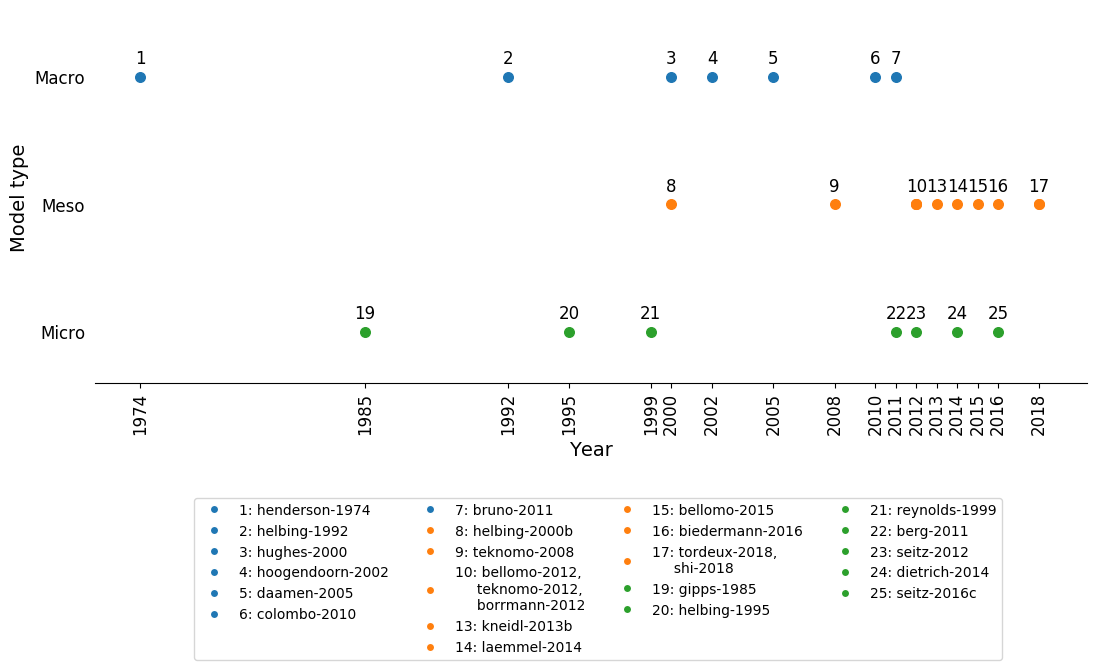

In [51]:
def plot_publications_as_scatter_plot(axis, data):
    for model_type, df in data.groupby(["Type"]):
        markersize = 48
        axis.scatter(df["Year"], df["y"], s=markersize, label=model_type)

def add_labels_to_plot(axis, data):
    """Label dots of scatter plot with numbers."""
    label_handles = []
    
    type_to_color = {"macro": "C0", "meso": "C1", "micro": "C2"}
    
    for model_type, df in data.groupby(["Type"]):
        for index, row in df.iterrows():
            if row["duplicated"] == False:
                label = index + 1
                y_offset = 0.05
                handle = axis.text(row["Year"], row["y"] + y_offset, label, horizontalalignment="center")
                
                plot_color = type_to_color[model_type]
                label_handles.append((index, handle, plot_color))
                
    return label_handles

def create_legend(axis, data, label_handles):
    """Map numbers in scatter plot to corresponding BibTeX keys."""
    legend_labels = []
    for index, text_handle, plot_color in label_handles:
        row = data.loc[index, :]
        year = row["Year"]
        model_type = row["Type"]
        
        filtered_data = data[(data["Type"] == model_type) & (data["Year"] == year)]
        joined_bibtex_keys = ",\n     ".join(filtered_data["BibTeX Key"])
        legend_text = "{}: {}".format(index + 1, joined_bibtex_keys)
        
        legend_labels.append(legend_text)
    
    # Create a patch for the legend
    # matplotlib ignores the shape of the create object but uses the shape of the marker!
    # See: https://stackoverflow.com/questions/11423369/matplotlib-legend-circle-markers
    circle_handles = [lines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor=pair[2]) for pair in label_handles]
    # Place legend outside of axis' bounding box
    axis.legend(circle_handles, legend_labels, loc=(0.10, -0.75), ncol=4)

def apply_plot_settings(axis):
    for side in ["left", "right","top"]:
        axis.spines[side].set_visible(False)
        
    axis.tick_params(
        axis="y",
        which="both",
        left=False,
        labelleft=True
    )

    axis.set_xlabel("Year")
    axis.set_xticks(df["Year"].unique())
    plt.xticks(rotation=90)
    
    axis.set_ylabel("Model type")
    axis.set_yticks(sorted(text_to_yvalue.values()))
    axis.set_yticklabels(["Micro", "Meso", "Macro"])
    axis.set_ylim(0.8, text_to_yvalue["macro"] + 0.25)
    
# use_default_plot_settings()

# Default "figsize=(6.4, 4.8)". Stretch it in horizontal direction
# so that distance between data points gets bigger.
fig = plt.figure(figsize=(12.8, 4.8))
ax = fig.add_subplot(111)

# ax.set_title("Publications by model types: Macro-, Meso- and Microscopic")
plot_publications_as_scatter_plot(ax, df)
label_handles = add_labels_to_plot(ax, df)
create_legend(ax, df, label_handles)
apply_plot_settings(ax)

fig.savefig("LocomotionModels-ByType.pdf", bbox_inches="tight", transparent=True)